In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import _pickle as cPickle
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import pickle

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

import _pickle as cPickle

#reading csv in dataframe
df = pd.read_csv('//datc//opschaler//combined_gas_smart_weather_dfs//processed/all_dwellings_combined_hour.csv', delimiter='\t', parse_dates=['datetime'])
df = df.set_index(['datetime'])
df = df.dropna()


print(df.shape)


(105438, 24)


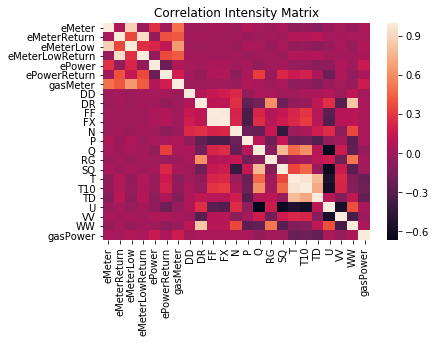

KeyError: "['datetime'] not found in axis"

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("Correlation Intensity Matrix")
plt.show()



df = df.drop(['WW', 'VV', 'P', 'DR', 'SQ', 'TD', 'T10', 'FX'], axis=1) # Drop weather columns which contain correlated information, keep only one type
#sns.heatmap(data.corr(), annot=True)

df = df.drop(['ePower', 'ePowerReturn', 'datetime'], axis=1) # Drop if want to predict gasPower



print(df.shape)
cols=list(df.columns.values)
print(cols)
df.head()

In [8]:
#features[:,26]=le.fit_transform(features[:,26])   #converting string value to numerical numbers
#print(features[:3]) 

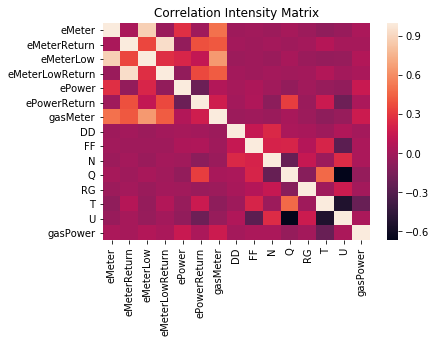

eMeter             False
eMeterReturn       False
eMeterLow          False
eMeterLowReturn    False
ePower             False
ePowerReturn       False
gasMeter           False
DD                 False
FF                 False
N                  False
Q                  False
RG                 False
T                  False
U                  False
dwelling           False
dtype: bool
(105438, 15)


In [9]:
import matplotlib.pyplot as plt
labels=df[['gasPower']].values

scl=StandardScaler()

labels=scl.fit_transform(labels)


import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("Correlation Intensity Matrix")
plt.show()



df=df.drop(['gasPower'], axis=1)

print(df.isnull().any())

print(df.shape)
features=df.values


with open('features', 'wb') as fp:
    pickle.dump(features, fp)

with open('labels', 'wb') as fp:
    pickle.dump(labels, fp)

with open('label_encoder.pkl', 'wb') as fid:
    cPickle.dump(le, fid)


with open('label_scl.pkl', 'wb') as fid:
    cPickle.dump(scl, fid)

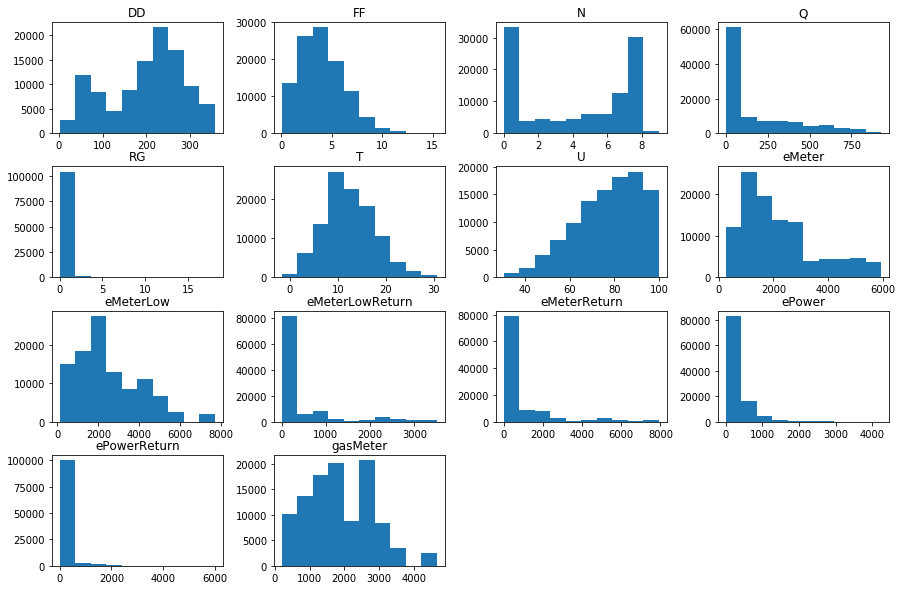

In [12]:
# I printed the histograms for features with high correlations
histohrams = df.hist(grid=False, figsize=(15, 10))
